In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [5]:
#pattern 1
cep_file_path = "C:\\Users\\GE796684\\Downloads\\pat2.xlsx"

# Define the columns and row range
columns = ["B"]
excel_sheets = ["LatP9all", "LatP6all"]
start_row = 2

In [6]:
def extract_data(file_path, label, end_row, excel_sheets):
    wb = load_workbook(filename=file_path, data_only=True)
    records = []
    for sheet_name in excel_sheets:
        sheet = wb[sheet_name]
        for col in columns:
            for row in range(start_row, end_row + 1):
                val = sheet[f"{col}{row}"].value
                if val is not None:
                    records.append(
                        {"Latency": val, "Parallelism": sheet_name, "System": label}
                    )
    return pd.DataFrame(records)

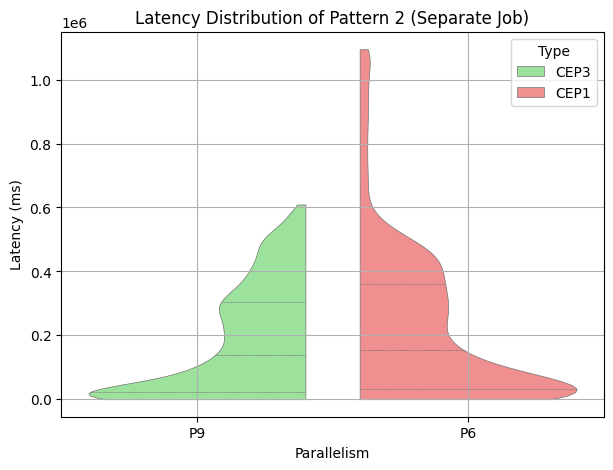

In [14]:
df_cep_p9 = extract_data(cep_file_path, "CEP9",3000,["LatP9all"])
df_cep_p6 = extract_data(cep_file_path, "CEP6",3000,["LatP6all"])

df_all = pd.concat([df_cep_p9,df_cep_p6], ignore_index=True)

plt.figure(figsize=(7, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    hue="System",
    data=df_all,
    split=True,
    inner="quart",
    palette={"CEP9": "#90EE90", "CEP6":"#FF7F7F"},
    linewidth=0.5,
    cut=0
)

plt.title("Latency Distribution of Pattern 2 (Separate Job)")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0, 1], labels=["P9", "P6"])

handles, labels = plt.gca().get_legend_handles_labels()
custom_legend = ["CEP3","CEP1"]
plt.legend(handles[:2] ,custom_legend,title="Type")

plt.grid(True)
plt.show()